# 🎓 Visual ML Demo: Predict Math Scores Using Student Data
This enhanced version adds **interactive visualizations** to help cadets understand the relationship between features, model predictions, and performance.

We'll use **Linear Regression** to predict `math score` and visualize how well the model works.

In [1]:
# 📦 Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from ipywidgets import interact

In [3]:
# 📊 Step 2: Load Dataset
#df = pd.read_csv('/mnt/data/StudentsPerformance.csv')
df = pd.read_csv('/content/StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
# 🔄 Step 3: Encode Categorical Variables
df['gender_encoded'] = LabelEncoder().fit_transform(df['gender'])
df['testprep_encoded'] = LabelEncoder().fit_transform(df['test preparation course'])

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


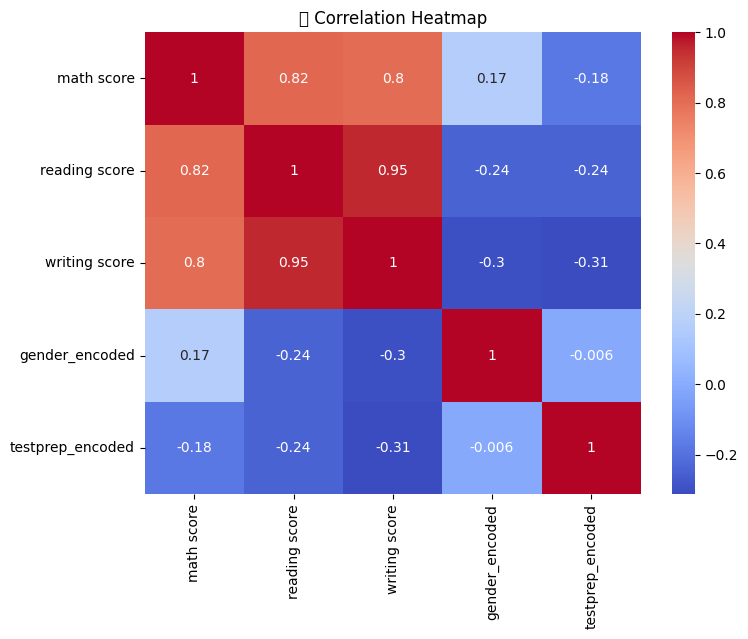

In [5]:
# 🔍 Step 4: Show Feature Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("📊 Correlation Heatmap")
plt.show()

In [6]:
# 🧮 Step 5: Prepare Features and Target
X = df[['reading score', 'writing score', 'gender_encoded', 'testprep_encoded']]
y = df['math score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
# 🤖 Step 6: Train Model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [11]:
# 📏 Step 7: Evaluate Model
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(rmse)
r2 = r2_score(y_test, y_pred)
print(f'MAE: {mae:.2f}\nRMSE: {rmse:.2f}\nR² Score: {r2:.2f}')

MAE: 4.70
RMSE: 5.92
R² Score: 0.86


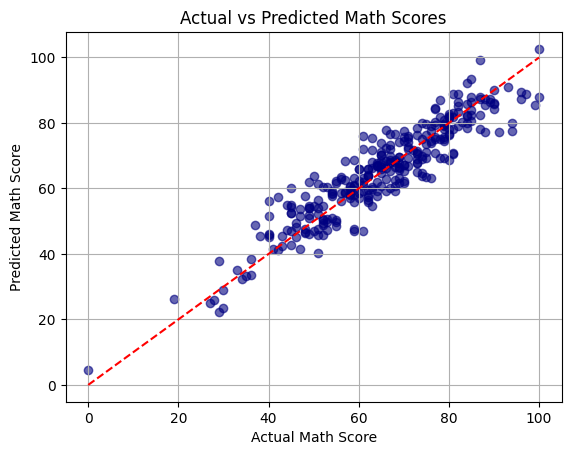

In [12]:
# 📈 Step 8: Actual vs Predicted Plot
plt.scatter(y_test, y_pred, alpha=0.6, color='navy')
plt.plot([0, 100], [0, 100], color='red', linestyle='--')
plt.xlabel("Actual Math Score")
plt.ylabel("Predicted Math Score")
plt.title("Actual vs Predicted Math Scores")
plt.grid(True)
plt.show()

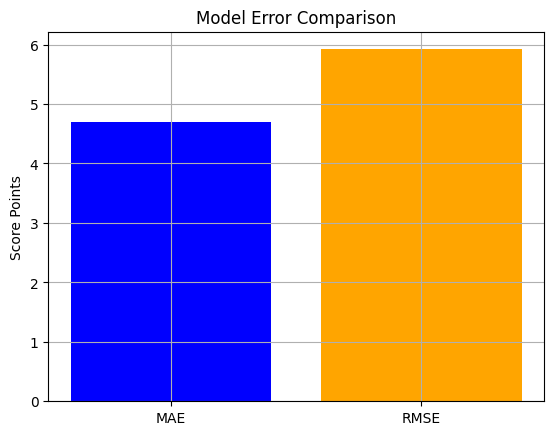

In [13]:
# 📉 Step 9: Visualize MAE vs RMSE
plt.bar(['MAE', 'RMSE'], [mae, rmse], color=['blue', 'orange'])
plt.title("Model Error Comparison")
plt.ylabel("Score Points")
plt.grid(True)
plt.show()

In [16]:
# 🎯 Step 10: Try Your Own Prediction with Full Control (including Gender)
def predict_interactive_full(reading, writing, gender, test_prep):
    gender_encoded = 1 if gender == 'Male' else 0
    prep_encoded = 1 if test_prep == 'completed' else 0
    input_data = np.array([[reading, writing, gender_encoded, prep_encoded]])
    predicted = model.predict(input_data)[0]
    print(f"Predicted Math Score: {predicted:.2f}")

interact(
    predict_interactive_full,
    reading=(0, 100),
    writing=(0, 100),
    gender=['Male', 'Female'],
    test_prep=['completed', 'none']
)

interactive(children=(IntSlider(value=50, description='reading'), IntSlider(value=50, description='writing'), …

<function __main__.predict_interactive_full(reading, writing, gender, test_prep)>